In [1]:
#mport packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize

In [2]:
#Read data for analysis and drop nan / uneeded rows
data = pd.read_excel('total_returns.xlsx')
data.drop(data.index[0], inplace=True)
data.drop(columns = ['Unnamed: 0'], inplace=True) 
data.dropna(axis=1, how='any', inplace = True)
print(data.shape) #810 stocks included
data = data.astype(np.float) #11 years of annual returns for 810 securities

(11, 810)


In [3]:
above = data.loc[:, (data >= 75).any()].columns #Remove all stocks with any year return greater than 75% (outliers)
data.drop(columns=above, inplace = True)
data.reset_index(inplace = True, drop = True)
print(data.shape) #Removed 402 outlier securities
data #View master dataframe (11 years of annual returns with 408 stocks)

(11, 408)


,UFCS US Equity,BKE US Equity,XLNX US Equity,VMI US Equity,K US Equity,KMT US Equity,AXE US Equity,BIO/B US Equity,INTU US Equity,ORLY US Equity,...,ADP US Equity,CBU US Equity,WM US Equity,AGCO US Equity,SNPS US Equity,MNRO US Equity,ROLL US Equity,FDS US Equity,KBR US Equity,CCO US Equity
0,8.9858,8.1455,-16.5018,-30.7228,-14.1127,-40.3928,-51.6300,-33.6222,-24.7390,-5.2112,...,-9.0491,27.5147,4.7907,-65.2986,-28.5769,32.7181,-53.3364,-19.5592,-60.4567,-77.7657
1,-39.3544,45.3522,44.8116,28.9148,25.2244,19.5808,56.3745,40.3816,29.1719,24.0078,...,12.6985,-16.6671,6.3171,37.0920,20.3024,32.7372,19.9704,51.0701,26.4169,68.9431
2,26.0983,41.3943,18.5369,14.0270,-1.0096,54.8451,34.5625,6.8567,60.4295,58.4995,...,11.6239,49.6321,13.2022,56.6481,20.7810,56.5547,60.6247,44.0708,61.7101,35.1299
3,-6.6994,16.3409,13.1409,3.1215,2.1749,-6.2325,-0.1507,-8.8553,7.0121,32.3237,...,20.1059,4.3423,-7.7149,-15.1796,1.0777,13.2272,6.7042,-5.8966,-7.9259,-10.6125
4,11.2825,23.2336,14.6925,51.4484,14.1925,11.2140,15.0998,9.2016,14.3081,11.8449,...,8.5160,2.2961,7.6368,14.3123,17.0418,-8.7605,20.0719,2.1729,8.0810,-0.8272
5,34.5173,19.1513,31.0938,9.9263,12.5980,32.2366,48.5113,18.8615,29.7428,43.9387,...,45.5836,50.0968,37.8502,21.3568,27.4369,62.6221,41.3022,24.9378,7.6625,53.4771
6,6.5880,4.4766,-3.3247,-13.9816,10.3318,-30.1032,-1.5361,-2.5875,22.0502,49.6543,...,20.4485,-0.8385,18.2203,-22.9571,7.1481,3.4901,-5.7241,31.3088,-46.0580,11.6042
7,32.2781,-36.8746,11.6293,-15.3990,13.7966,-45.0965,-31.7319,14.2478,5.8406,31.5647,...,4.0955,8.2565,7.1291,1.3896,4.9229,15.5951,0.0930,16.7175,1.7025,-47.2144
8,31.2807,-20.1544,32.0500,34.4082,4.7682,68.4657,34.2110,33.0259,20.1760,9.8611,...,24.2543,59.0390,36.3769,28.8216,29.0506,-12.6777,43.6910,1.7417,0.7276,40.7064
9,-4.9595,13.8769,14.0996,18.8415,-4.9162,58.1329,-6.2307,30.0846,39.2005,-13.6022,...,16.5278,-10.8852,24.4572,24.5042,44.8182,0.9659,36.1922,19.4427,21.1846,9.8355


In [4]:
tickers = data.columns #Get list of stock tickers
returns_means = data.mean() #Dataframe of equally weighted returns 
cov = data.cov() #Dataframe of covariance matrix
print(cov.shape) #408 x 408 matrix 
risk_free = .5 #Set risk free rate
cov.head(3) #View covariance matrix

(408, 408)


,UFCS US Equity,BKE US Equity,XLNX US Equity,VMI US Equity,K US Equity,KMT US Equity,AXE US Equity,BIO/B US Equity,INTU US Equity,ORLY US Equity,...,ADP US Equity,CBU US Equity,WM US Equity,AGCO US Equity,SNPS US Equity,MNRO US Equity,ROLL US Equity,FDS US Equity,KBR US Equity,CCO US Equity
UFCS US Equity,516.509795,-319.810252,-34.950705,-156.946720,-88.501255,-25.459238,-157.562897,-91.976281,19.187990,162.242069,...,62.881457,423.966537,128.507565,-26.319599,-22.718590,66.481792,112.711151,-128.863329,-47.161123,-151.988715
BKE US Equity,-319.810252,600.908683,85.645639,274.232418,58.836945,389.270216,478.564013,50.041409,222.729155,65.960008,...,30.617143,-91.974707,-46.337959,318.389504,99.329863,271.008209,222.425271,246.713007,373.679140,481.707218
XLNX US Equity,-34.950705,85.645639,293.215769,230.101765,94.505237,378.206342,438.618973,286.493483,206.516809,86.445879,...,123.585171,36.487861,68.360538,419.305006,199.287129,62.649733,362.603532,178.424764,359.349669,613.128971


In [5]:
np.random.seed(20) #Set seed for replicability
random.seed(20) #Set seed for replicability
iterations = 550000 #Set # of portfolios to simulate 
rand_range = range(10,21)# Initially select 550,000 portfolios of 10 stocks to 500,000 portfolios of 20 stocks 

#Initialize lists
stocks = []
stock_returns = []
stock_std = []
stock_allocation = []
sharpe_ratios = []


# Run nested loop to simulate random weights and random portfolios ranging from 5 to 42 stock portfolios
for i in rand_range:
    for _ in range(iterations):
        #Randomly choose stocks
        chosen = random.sample(range(len(tickers)), i) 
        return_sampled = returns_means[chosen]
        #Randomly choose weights
        allocation = np.random.random(len(chosen))
        allocation /= np.sum(allocation)
        #Find portfolio return, std dev, and sharpe ratio based on stocks selected and weights selected
        returns = np.dot(allocation, return_sampled)
        std = np.sqrt(np.dot(allocation.T, np.dot(cov.iloc[chosen, chosen], allocation)))
        #Add to lists for analysis outside of loop
        stock_returns.append(returns)
        stock_std.append(std)
        stock_allocation.append(allocation)
        sharpe_ratios.append((returns - risk_free)/std)
        stocks.append(chosen)

#Turn each list into a dictionary
portfolio = {'Returns': stock_returns,
            'Standard Deviation': stock_std,
            'Sharpe': sharpe_ratios}

#Turn dictionary into dataframe
df = pd.DataFrame(portfolio)

#Determine the index of the best sharpe ratio and determine return/risk/weight/stocks for best portfolio
index_sharpe = np.argmax(sharpe_ratios)
index_std = np.argmin(stock_std)
index_ret = np.argmax(stock_returns)
best_stock = tickers[stocks[index_sharpe]]
best_allocation = stock_allocation[index_sharpe]
best_port={'Tickers':best_stock,
          'allocation':best_allocation}

#View best portoflio based on stochastic simulation
print("---------------------------------")
print("Sharpe Ratio:",round(max(sharpe_ratios),2))
print("Returns:",round(stock_returns[index_sharpe],2))
print("Standard Deviation:",round(stock_std[index_sharpe],2))
print("---------------------------------")

---------------------------------
Sharpe Ratio: 2.5
Returns: 17.45
Standard Deviation: 6.79
---------------------------------


In [6]:
#View weighted stocks in portfolio
df_sim = pd.DataFrame(list(zip(best_port['Tickers'], best_port['allocation'])), 
               columns =['Stock', 'Weight']) 
df_sim.sort_values(by='Weight', ascending = False, inplace = True)
df_sim['Invest ($1M)'] = round((df_sim['Weight'] * 1000000))
df_sim['Weight'] = round(df_sim['Weight'] * 100,2).astype(str) +"%"
df_sim.reset_index(inplace = True, drop = True)
df_sim

,Stock,Weight,Invest ($1M)
0,ROST US Equity,17.85%,178498.0
1,SNA US Equity,15.88%,158847.0
2,MMSI US Equity,15.19%,151948.0
3,CFFN US Equity,13.31%,133061.0
4,NSP US Equity,10.9%,109037.0
5,AAP US Equity,7.73%,77335.0
6,AJG US Equity,6.94%,69363.0
7,MORN US Equity,6.2%,61953.0
8,Y US Equity,4.14%,41380.0
9,XRAY US Equity,1.86%,18579.0


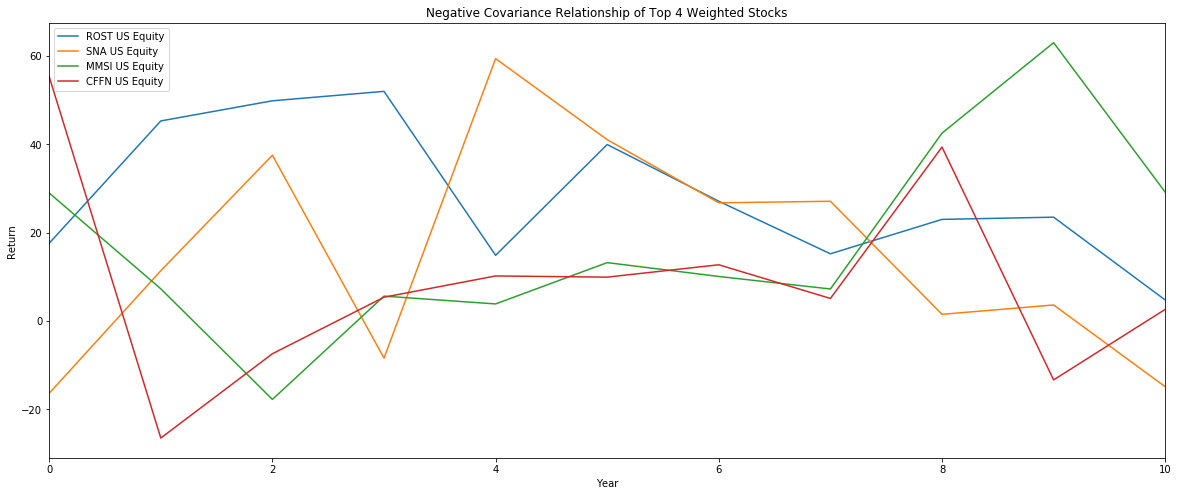

In [7]:
#Visualize top 4 weighted stocks to understand how we hedge risk vs return. This is exactly the goal (min portfolio risk).
data[df_sim['Stock'][[0,1,2,3]]].plot.line(figsize = (20,8),title ='Negative Covariance Relationship of Top 4 Weighted Stocks')
plt.xlabel('Year')
plt.ylabel("Return")
plt.show()

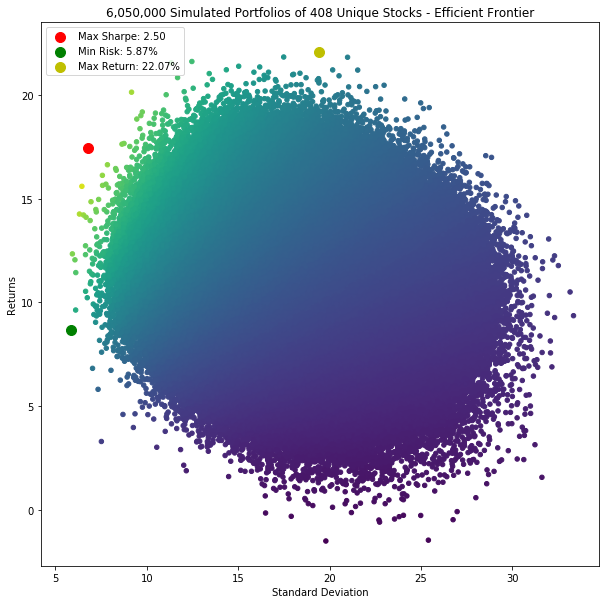

In [8]:
#Visualize each portfolio by risk/return and mark optimal portfolio
df.plot.scatter(x='Standard Deviation', y='Returns',colorbar = False,figsize=(10,10), c='Sharpe',cmap = 'viridis')
plt.scatter(y = stock_returns[index_sharpe], x = stock_std[index_sharpe], marker = 'o',color='r',s=100, label='Max Sharpe: {:.2f}'.format(max(sharpe_ratios)))
plt.scatter(y = stock_returns[index_std], x = stock_std[index_std], marker = 'o',color='g',s=100, label='Min Risk: {:.2f}%'.format(min(stock_std)))
plt.scatter(y = stock_returns[index_ret], x = stock_std[index_ret], marker = 'o',color='y',s=100, label='Max Return: {:.2f}%'.format(max(stock_returns)))
plt.title('{:,} Simulated Portfolios of {} Unique Stocks - Efficient Frontier'.format(len(sharpe_ratios),len(tickers)))
plt.legend(loc = 'upper left')
plt.show()

In [9]:
#Find optimal portfolio by utilizing optimization 
#Set constraints, by relaxing we increase the feasible region and opportunity for higher objective (Sharpe Ratio)
return_min = 10
return_max = 25
std_min = 6.5
std_max = 25

#Return must be between 10% and 25% 
def min_return(weights): 
    return metrics(weights)[0] - return_min
def max_return(weights): 
    return -metrics(weights)[0] + return_max

#Standard Deviation must be between 6.5% and 25% 
def min_std(weights): 
    return metrics(weights)[1] - std_min
def max_std(weights): 
    return -metrics(weights)[1] + std_max

#Due to floating point errors, use >=1 and <=1 to make =1. Weights must add up to 1    
def check_sum_1(weights): 
    return -np.sum(weights) + 1.00
def check_sum_2(weights): 
    return np.sum(weights) - 1.00

#Helper function to obtain: expected return, std, and sharpe ratio 
def metrics(weights): 
    weights = np.array(weights)
    ret_opt = np.dot(weights, returns_means)
    std_opt = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))
    sharpe_opt = (ret_opt - risk_free) / std_opt 
    return np.array([ret_opt,std_opt,sharpe_opt])

#Must have 5 stocks weighted at 8% or greater 
def min_weight(weights): 
    return len(np.where(weights>.8)[0]) - 5.00

#Must have between 5 and 50 stocks in portfolio
def max_stock(weights): 
    return -len(np.where(weights>.001)[0]) + 50
def min_stock(weights): 
    return len(np.where(weights>.001)[0]) - 5

#Objective Function
def sharpe(weights): 
    return -metrics(weights)[2] 


#Add each constraint to a list 
cons = ([{'type':'ineq','fun':check_sum_1},
         {'type':'ineq','fun':min_weight},
        {'type':'ineq','fun':check_sum_2},
         {'type':'ineq','fun':min_std},
         {'type':'ineq','fun':max_std},
        {'type':'ineq','fun':min_stock},
         {'type':'ineq','fun':max_stock},
         {'type':'ineq','fun':max_return},
        {'type':'ineq','fun':min_return}])

#Set range of each weight between 0 and 1
bounds = tuple((0,1) for i in range(len(tickers)))
#Create initial guess list
init_guess = [1/len(tickers) for i in range(len(tickers))]
results = minimize(sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [10]:
#View results from optimization
print("---------------------------------")
print("Stocks in Portfolio:",len(np.where(results.x >=.001)[0]))
print("Sharpe Ratio:",round(metrics(results.x)[2],2))
print("Returns:",round(metrics(results.x)[0],3))
print("Standard Deviation:",round(metrics(results.x)[1],3))
print("Sum of Weights:", round(np.sum(results.x),3)) 
print("---------------------------------")

---------------------------------
Stocks in Portfolio: 18
Sharpe Ratio: 3.77
Returns: 25.0
Standard Deviation: 6.5
Sum of Weights: 1.0
---------------------------------


In [11]:
#View weighted stocks in portfolio
df_opt = pd.DataFrame(list(zip(tickers[np.where(results.x >=.001)], results.x[np.where(results.x >= .001)])), 
               columns =['Stock', 'Weight']) 
df_opt.sort_values(by='Weight', ascending = False, inplace = True)
df_opt['Invest ($1M)'] = round((df_opt['Weight'] * 1000000))
df_opt['Weight'] = round(df_opt['Weight'] * 100,2).astype(str) +"%"
df_opt.reset_index(inplace = True, drop = True)
df_opt

,Stock,Weight,Invest ($1M)
0,DLTR US Equity,12.78%,127780.0
1,LHCG US Equity,11.77%,117667.0
2,ROST US Equity,11.65%,116500.0
3,NSP US Equity,9.21%,92065.0
4,PLUS US Equity,8.62%,86191.0
5,ORLY US Equity,8.59%,85857.0
6,TDG US Equity,7.46%,74574.0
7,EXPO US Equity,5.75%,57512.0
8,MMSI US Equity,5.6%,56007.0
9,ODFL US Equity,4.58%,45771.0


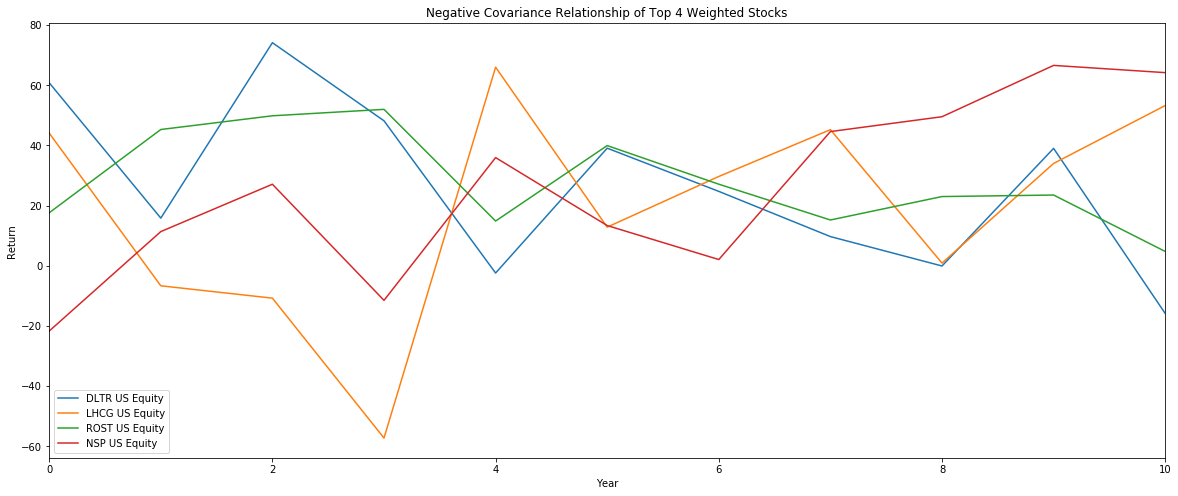

In [12]:
#Visualize top 4 weighted stocks to understand how we hedge risk vs return. This is exactly the goal (min portfolio risk).
data[df_opt['Stock'][[0,1,2,3]]].plot.line(figsize = (20,8),title ='Negative Covariance Relationship of Top 4 Weighted Stocks')
plt.xlabel('Year')
plt.ylabel("Return")
plt.show()